## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [5]:
project_path = "/content/drive/My Drive/AIML/Colab_Notebook/Residency8/Project/Dog_breed_Classification/Dataset/"

import os
os.listdir(project_path)

['labels.csv.zip',
 'sample_submission.csv.zip',
 'test.zip',
 'train.zip',
 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'train.zip', 'r') as zip:
  zip.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'test.zip', 'r') as zip:
  zip.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'sample_submission.csv.zip', 'r') as zip:
  zip.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'labels.csv.zip', 'r') as zip:
  zip.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [85]:
labels = pd.read_csv('/content/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [86]:
sample_submission_df=pd.read_csv('/content/sample_submission.csv')
sample_submission_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

### Print the count of each category of Dogs given in the dataset



In [87]:
breed_count = labels['breed'].value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [88]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [0]:
import numpy as np
targets = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets, sparse= True)
one_hot_labels = np.asarray(one_hot)

In [90]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channels=1

In [92]:
from tqdm import tqdm
import cv2
x_train=[]
y_train=[]
for f,img in tqdm(labels.values):
    train_img=cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize=cv2.resize(train_img,(img_rows,img_cols))
    x_train.append(train_img_resize)
    y_train.append(img)


100%|██████████| 10222/10222 [00:29<00:00, 348.16it/s]


scottish_deerhound


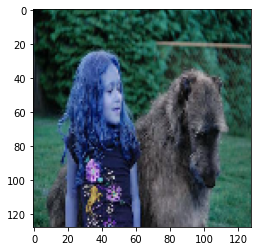

In [93]:
import matplotlib.pyplot as plt

plt.imshow(x_train[9])  # image
print(y_train[9]) #Label
plt.show()

In [94]:
os.path.exists("./train")

True

In [0]:
path = "./train/"

In [0]:
new_label_df=labels.assign(image_path=lambda x: path + labels['id'] +'.jpg')

In [97]:
new_label_df.head()

,id,breed,image_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [98]:
new_label_df.shape

(10222, 3)

In [0]:
image_pixel=np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=(128, 128))) for img in new_label_df['image_path'].values.tolist()])

In [100]:
image_pixel.shape

(10222, 128, 128, 3)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
dog_breed_df=new_label_df["breed"]

In [102]:
dog_breed_df.head(10)

0           boston_bull
1                 dingo
2              pekinese
3              bluetick
4      golden_retriever
5    bedlington_terrier
6    bedlington_terrier
7                borzoi
8               basenji
9    scottish_deerhound
Name: breed, dtype: object

In [0]:
#Normalizing the input
x_train = image_pixel
x_train/=255
y_train= pd.DataFrame(one_hot_labels)

In [104]:
print(x_train.shape)
print(y_train.shape)

(10222, 128, 128, 3)
(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_valid,Y_train,Y_valid= train_test_split(x_train,y_train,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(8177, 128, 128, 3)
(8177, 120)
(2045, 128, 128, 3)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img =sample_submission_df["id"]

Run the below code to load the test image files in x_test_feature

In [34]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:14<00:00, 733.87it/s]


In [35]:
os.path.exists("./test")

True

In [0]:
test_path='./test/'

In [0]:
new_test_df=sample_submission_df.assign(img_path=lambda x: test_path + sample_submission_df['id'] +'.jpg')

In [38]:
new_test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,img_path
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,./test/000621fb3cbb32d8935728e48679680e.jpg
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,./test/00102ee9d8eb90812350685311fe5890.jpg
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,./test/0012a730dfa437f5f3613fb75efcd4ce.jpg
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.0

Normalize the test data and convert it into 4 dimensions

In [39]:
img_pixel=np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=(128, 128))) for img in tqdm(new_test_df['img_path'].values.tolist())])


100%|██████████| 10357/10357 [00:41<00:00, 251.90it/s]


In [40]:
img_pixel.shape

(10357, 128, 128, 3)

In [0]:
#Normalizing the input
x_test_data=img_pixel
x_test_data/=255


In [0]:
y_test_data=pd.get_dummies(new_test_df)

In [43]:
print(x_test_data.shape)
print(y_test_data.shape)

(10357, 128, 128, 3)
(10357, 20834)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers

In [0]:
##Initialize the Artificial Neural Network Classifier
dog_model = Sequential()

In [0]:
  # 1st Conv Layer
    dog_model.add(Convolution2D(32, kernel_size=(5, 5), input_shape=(128, 128, 3)))
    dog_model.add(Activation('relu'))
  # 2nd Conv Layer
    dog_model.add(Convolution2D(32, kernel_size=(3, 3)))   
    dog_model.add(Activation('relu'))

  # Fully Connected Layer
    dog_model.add(Flatten())
    dog_model.add(Dense(256))
    dog_model.add(Activation('relu'))

  # Prediction Layer
    dog_model.add(Dense(120))
    dog_model.add(Activation('softmax'))
 # Loss and Optimizer
    dog_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
  # Store Training Results
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


In [48]:
dog_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               121929984 
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
batch_size=128
epochs=10
num_classes=120

In [50]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(8177, 128, 128, 3)
(8177, 120)
(2045, 128, 128, 3)
(2045, 120)


In [51]:
dog_class_model = dog_model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, Y_valid))

Epoch 1/10
64/64 [==============================] - 6s 95ms/step - loss: 5.9204 - accuracy: 0.0098 - val_loss: 4.7849 - val_accuracy: 0.0166
Epoch 2/10
64/64 [==============================] - 6s 87ms/step - loss: 4.7079 - accuracy: 0.0226 - val_loss: 4.6860 - val_accuracy: 0.0205
Epoch 3/10
64/64 [==============================] - 6s 87ms/step - loss: 4.0005 - accuracy: 0.1513 - val_loss: 4.9235 - val_accuracy: 0.0298
Epoch 4/10
64/64 [==============================] - 6s 88ms/step - loss: 1.5779 - accuracy: 0.6611 - val_loss: 6.3773 - val_accuracy: 0.0264
Epoch 5/10
64/64 [==============================] - 6s 86ms/step - loss: 0.2177 - accuracy: 0.9612 - val_loss: 8.7823 - val_accuracy: 0.0352
Epoch 6/10
64/64 [==============================] - 6s 87ms/step - loss: 0.0435 - accuracy: 0.9963 - val_loss: 9.6151 - val_accuracy: 0.0313
Epoch 7/10
64/64 [==============================] - 6s 87ms/step - loss: 0.0272 - accuracy: 0.9983 - val_loss: 9.3825 - val_accuracy: 0.0298
Epoch 8/10
64

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flip images

In [0]:
# This will do preprocessing and realtime data augmentation:
val_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flip images

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Model accuracy is still poor!!!

In [69]:
dog_model.fit_generator(train_generator.flow(X_train, Y_train,batch_size=batch_size),
                    epochs=10, steps_per_epoch=100,
                    validation_data=val_generator.flow(X_valid, Y_valid,batch_size=batch_size), validation_steps=100, callbacks=callback_list)

Epoch 1/10
100/100 [==============================] - 93s 928ms/step - loss: 4.7743 - accuracy: 0.0131 - val_loss: 4.7934 - val_accuracy: 0.0095
Epoch 2/10
100/100 [==============================] - 94s 939ms/step - loss: 4.7738 - accuracy: 0.0126 - val_loss: 4.7940 - val_accuracy: 0.0099
Epoch 3/10
100/100 [==============================] - 92s 918ms/step - loss: 4.7742 - accuracy: 0.0132 - val_loss: 4.7939 - val_accuracy: 0.0096
Epoch 4/10
100/100 [==============================] - 91s 912ms/step - loss: 4.7747 - accuracy: 0.0132 - val_loss: 4.7937 - val_accuracy: 0.0099
Epoch 5/10
100/100 [==============================] - 92s 917ms/step - loss: 4.7749 - accuracy: 0.0127 - val_loss: 4.7931 - val_accuracy: 0.0095
Epoch 6/10
100/100 [==============================] - 92s 925ms/step - loss: 4.7741 - accuracy: 0.0125 - val_loss: 4.7944 - val_accuracy: 0.0099
Epoch 7/10
100/100 [==============================] - 92s 922ms/step - loss: 4.7741 - accuracy: 0.0131 - val_loss: 4.7934 - val_ac

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [58]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Adding custom Layers 
Out_base_model = base_model.output

#Flatten layer
flat_base_model = Flatten()(Out_base_model)

# Adds a densely-connected layer with 1024 units to the model:
dense_lay1 = Dense(1024,activation = 'relu')(flat_base_model)

#Adds a densely-connected layer with 256 units to the model:
dense_lay2= Dense(256,activation = 'relu')(dense_lay1)

# Add an output layer with 120 output units:
predict = Dense(120,activation = 'softmax')(dense_lay2)

# creating the final model 
Transfer_Model = tf.keras.Model(inputs=base_model.input,outputs=predict)


### Make all the layers in the base_model (VGG16) to be non-trainable

In [61]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in base_model.layers:
  if('conv' in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'yellow'))
  print (colored(layer.trainable, 'green'))

input_1
True
block1_conv1
False
block1_conv2
False
block1_pool
True
block2_conv1
False
block2_conv2
False
block2_pool
True
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
True
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
True
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
True
global_average_pooling2d
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
  # Loss and Optimizer
Transfer_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
Transfer_Model.fit(X_train, Y_train, batch_size=128,epochs=10,verbose=1,validation_data=(X_valid, Y_valid))

Epoch 1/10
64/64 [==============================] - 8s 124ms/step - loss: 0.8716 - accuracy: 0.7856 - val_loss: 3.4511 - val_accuracy: 0.3545
Epoch 2/10
64/64 [==============================] - 8s 124ms/step - loss: 0.7934 - accuracy: 0.8125 - val_loss: 3.5268 - val_accuracy: 0.3496
Epoch 3/10
64/64 [==============================] - 8s 124ms/step - loss: 0.6997 - accuracy: 0.8407 - val_loss: 3.6060 - val_accuracy: 0.3423
Epoch 4/10
64/64 [==============================] - 8s 124ms/step - loss: 0.6344 - accuracy: 0.8601 - val_loss: 3.6735 - val_accuracy: 0.3433
Epoch 5/10
64/64 [==============================] - 8s 124ms/step - loss: 0.5550 - accuracy: 0.8854 - val_loss: 3.7402 - val_accuracy: 0.3301
Epoch 6/10
64/64 [==============================] - 8s 124ms/step - loss: 0.4929 - accuracy: 0.9042 - val_loss: 3.8119 - val_accuracy: 0.3320
Epoch 7/10
64/64 [==============================] - 8s 124ms/step - loss: 0.4382 - accuracy: 0.9233 - val_loss: 3.8825 - val_accuracy: 0.3281
Epoch 

In [124]:
Transfer_Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     